In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


In [2]:
import pandas as pd
training = pd.read_csv("../input/sentiment140/training.1600000.processed.noemoticon.csv",encoding = 'latin1')


In [3]:
columns = ['sentiment','id','date','query_string','user','text']

In [4]:
df = pd.read_csv("../input/sentiment140/training.1600000.processed.noemoticon.csv",encoding = 'latin-1',header = None,names=columns)

In [5]:
df['text'] = df['text'].str.encode('utf8')

In [6]:
df['text'] = df['text'].str.decode('utf8')


In [7]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [8]:
df[df['sentiment'] == 0]['sentiment'] # all the negative tweets

0         0
1         0
2         0
3         0
4         0
         ..
799995    0
799996    0
799997    0
799998    0
799999    0
Name: sentiment, Length: 800000, dtype: int64

In [9]:
df[df['sentiment'] == 4]['sentiment'] # all the positive tweets

800000     4
800001     4
800002     4
800003     4
800004     4
          ..
1599995    4
1599996    4
1599997    4
1599998    4
1599999    4
Name: sentiment, Length: 800000, dtype: int64

In [10]:
df

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [11]:
df.drop(columns = ['id','date','query_string','user'],inplace = True)

In [12]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [13]:
df[df['sentiment'] == 0].index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            799990, 799991, 799992, 799993, 799994, 799995, 799996, 799997,
            799998, 799999],
           dtype='int64', length=800000)

In [14]:
df[df['sentiment'] == 4].index

Int64Index([ 800000,  800001,  800002,  800003,  800004,  800005,  800006,
             800007,  800008,  800009,
            ...
            1599990, 1599991, 1599992, 1599993, 1599994, 1599995, 1599996,
            1599997, 1599998, 1599999],
           dtype='int64', length=800000)

In [15]:
df['sentiment'] = df['sentiment'].map({0:0,4:1})

In [16]:
# lets look at length of each string in the dataset
df['text_length'] = [len(words) for words in df['text']]

In [17]:
df

,sentiment,text,text_length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111
...,...,...,...
1599995,1,Just woke up. Having no school is the best fee...,56
1599996,1,TheWDB.com - Very cool to hear old Walt interv...,78
1599997,1,Are you ready for your MoJo Makeover? Ask me f...,57
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...,65


In [18]:
from pprint import pprint
data_dictonary = {
    'sentiment':{
        'type':df['sentiment'].dtype,
        'description':'sentiment_class 0 : negative, 1:positive'
    },
    'text':{
        'type':df['text'].dtype,
        'description':'individual tweet text'
        
    },
    'text_length':{
        'type':df['text_length'].dtype,
        'deescription':'This is the length of the text before cleaning'
    },
    'shape_of_the_dataset':df.shape
    
}

In [19]:
pprint(data_dictonary)

{'sentiment': {'description': 'sentiment_class 0 : negative, 1:positive',
               'type': dtype('int64')},
 'shape_of_the_dataset': (1600000, 3),
 'text': {'description': 'individual tweet text', 'type': dtype('O')},
 'text_length': {'deescription': 'This is the length of the text before '
                                 'cleaning',
                 'type': dtype('int64')}}


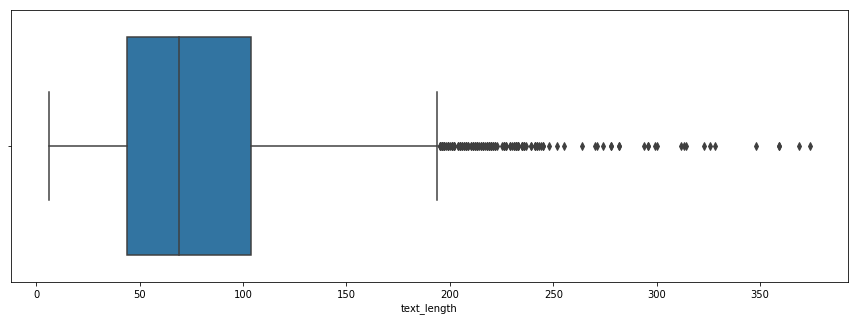

In [20]:
# lets find out overall distribution of text length of each text
plt.figure(figsize = (15,5))
sns.boxplot(df['text_length'])
# from the plot we observe that there are many outliers but most of the tweets are in the range 50 to 100

In [21]:
# lets take a detailed view at those outlier tweets
df[df['text_length'] > 140].head(4)

,sentiment,text,text_length
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145


**Preprocessing HTML encoding in the data**

In [22]:
df['text'][279] # we observe that there are various HTML tags and encodings in the data lets use beautifulSoup to convert 
# this into readable text

"Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. "

In [23]:
from bs4 import BeautifulSoup
BeautifulSoup(df['text'][279],'lxml').get_text()
# as we can observe that the data is converted into english

"Whinging. My client&boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&reviewed correctly. "

**In twitter textual dataset @mention are prevailent and they play no major role in sentiment analysis so its good to discard it**

In [24]:
df['text'][343]

'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [25]:
import re
re.sub(r'@[A-Za-z0-9]+','',df['text'][343]) # in this case we are using regular expressions
# this regular expression signifies a @ symbol followed by any number of characters numbers capital or small


' Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

**In tweets there are many hyper links which play no role in sentiment analysis of the data**

In [26]:
df['text'][0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [27]:
re.sub('https?://[A-Za-z0-9./]+','',df['text'][0]) # this regex can be used to remove hyper links

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

**UTF-8 BOM or utf-8 byte order mark is comes in text when the text is utf encoded this encoding allows the reader to identify a file ab being encoded as utf 8**

In [28]:
df['text'][226]

'Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [29]:
re.sub(r'ï¿½','?',df['text'][226])

'Tuesday?ll start with reflection ?n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

**Preprocesing hash-tags**

In [30]:
#the text associated with hashtag is quite important hence we only remove the hashtags in the text and keep the preceding text intact
df['text'][175]

"@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail"

In [31]:
re.sub("[^a-zA-Z]"," ",df['text'][175]) # as we can see by using this regular expression we removed the tweet where character @ and character # is
# substituted by zero

' machineplay I m so sorry you re having to go through this  Again    therapyfail'

In [32]:
from nltk.tokenize import WordPunctTokenizer
# with help of this tokenizer we can tokenize at space and word punctuationns
tokenizer = WordPunctTokenizer()


In [33]:
regex_at_hyperlink = r"@[A-Za-z)-9]|https?://[A-Za-z0-9./]+"
def data_cleaning(text):
    soup = BeautifulSoup(text,'lxml')
    clean_soup = soup.get_text()
    at_and_hyperlink_removed = re.sub(regex_at_hyperlink,'',clean_soup)
    remove_latin_tokens = re.sub(r'ï¿½','?',at_and_hyperlink_removed)
    hashtag_removed = re.sub("[^a-zA-Z]"," ",remove_latin_tokens) # this process may create unnecessary white spaces so we remove use strip function
    lower_case = hashtag_removed.lower()
    words = tokenizer.tokenize(lower_case)
    return (" ".join(words)).strip()
    

In [34]:
# time to check this function
df['text'][:100]

0     @switchfoot http://twitpic.com/2y1zl - Awww, t...
1     is upset that he can't update his Facebook by ...
2     @Kenichan I dived many times for the ball. Man...
3       my whole body feels itchy and like its on fire 
4     @nationwideclass no, it's not behaving at all....
                            ...                        
95    Strider is a sick little puppy  http://apps.fa...
96    so rylee,grace...wana go steve's party or not?...
97    hey, I actually won one of my bracket pools! T...
98    @stark YOU don't follow me, either  and i work...
99    A bad nite for the favorite teams: Astros and ...
Name: text, Length: 100, dtype: object

In [35]:
df['text'][:100].apply(lambda x : data_cleaning(x)) # this cleaner works perfectly

0     witchfoot awww that s a bummer you shoulda got...
1     is upset that he can t update his facebook by ...
2     enichan i dived many times for the ball manage...
3        my whole body feels itchy and like its on fire
4     ationwideclass no it s not behaving at all i m...
                            ...                        
95                       strider is a sick little puppy
96    so rylee grace wana go steve s party or not sa...
97    hey i actually won one of my bracket pools too...
98    tark you don t follow me either and i work for...
99    a bad nite for the favorite teams astros and s...
Name: text, Length: 100, dtype: object

In [36]:
#applying on whole data
clean_tweets = df['text'].apply(lambda x:data_cleaning(x))

In [37]:
clean_tweets.to_csv('clean_tweet.csv',encoding='utf-8')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [38]:
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv)
my_df.head()

,0,witchfoot awww that s a bummer you shoulda got david carr of third day to do it d
0,1,is upset that he can t update his facebook by ...
1,2,enichan i dived many times for the ball manage...
2,3,my whole body feels itchy and like its on fire
3,4,ationwideclass no it s not behaving at all i m...
4,5,wesidei not the whole crew
